Camera index with data_frame starting at 1: 0


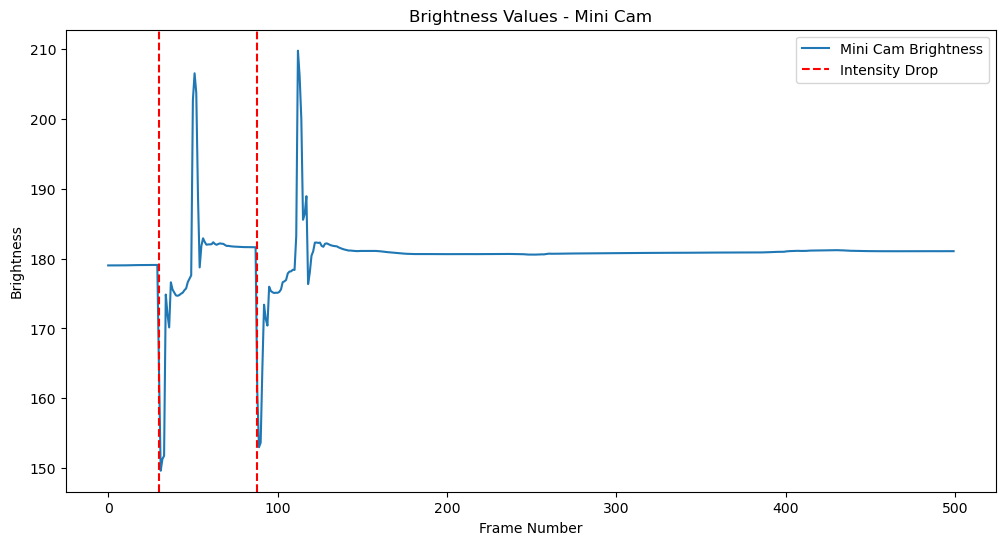

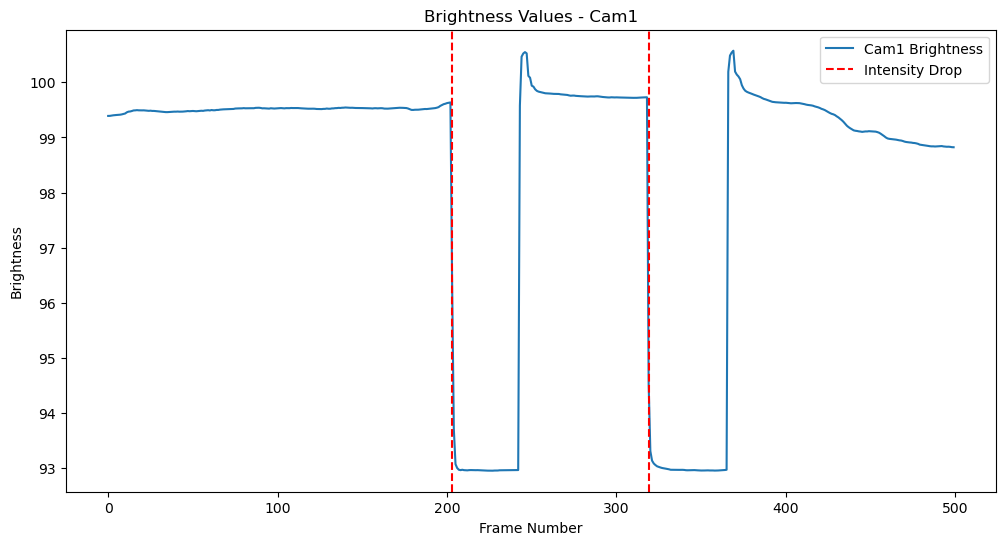

offset:  -4803.07486399998
pred current shape(27000, 3, 22)
preds transposed to (27000, 22, 3)
Aligned data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05/MIR_Aligned/aligned_predictions.h5
aligned_pred_3d_flat.shape: (8894, 66)
aligned_pred_3d.shape: (8894, 22, 3)
aligned_com.shape: (8894, 3)
Data loaded successfully!
Calcium data shape: (87, 8955)
Timestamps shape: (8955,)
Interpolated Ca data shape: (87, 8894)
ΔF/F interpolated shape: (87, 8894)
DataFrame with Ca and ΔF/F signals merged:
Updated DataFrame with Ca and ΔF/F data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05/MIR_Aligned/aligned_predictions_with_ca_and_dF_F.h5


In [1]:
import pandas as pd
import numpy as np
# # step one, dannce alignment
import os
import sys
sys.path.append(os.path.abspath('../..'))
from utlis.sync_utlis.mini_dannce_sync import sync_videos, align_miniscope_to_sixcam


rec_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05' #'/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42' #'/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_01/20240910V1r_BO_11_35'
mini_path = '/data/big_rim/mir_data/Oct3V1mini/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_25/17_09_14' #'/data/big_rim/mir_data/Oct3V1mini/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_25/15_50_39' #'/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/20240910-V1-R/customEntValHere/2024_11_01/11_39_00'
resultsss = sync_videos(
    rec_path,
    mini_path,
    start_frame=0,
    end_frame=500,
    threshold_mini=15,
    threshold_sixcam=3
)

align_miniscope_to_sixcam(resultsss, mini_path, rec_path)

# a_step_aligned_checke_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05/MIR_Aligned/aligned_predictions.h5'
# df_check= pd.read_hdf(a_step_aligned_checke_path, key='df')



# # # step 2, load dannce alignment and then do ca alaignments, as well as svaing
import os
import sys
sys.path.append(os.path.abspath('../..'))
from utlis.sync_utlis.mini_dannce_sync import load_aligneddannce_and_process_ca_data

rec_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05' #'/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42' #'/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_01/20240910V1r_BO_11_35'
mini_path = '/data/big_rim/mir_data/Oct3V1mini/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_25/17_09_14' #'/data/big_rim/mir_data/Oct3V1mini/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_25/15_50_39' #'/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/20240910-V1-R/customEntValHere/2024_11_01/11_39_00'

df_merged_with_dF_F = load_aligneddannce_and_process_ca_data(rec_path, mini_path)


# hdf5_file_path = os.path.join(rec_path, 'MIR_Aligned/aligned_predictions_with_ca_and_dF_F.h5')

# # Load the DataFrame from the HDF5 file
# df_merged_with_dF_F = pd.read_hdf(hdf5_file_path, key='df')

In [6]:
# df_check

,com_x,com_y,com_z,kp1_x,kp1_y,kp1_z,kp2_x,kp2_y,kp2_z,kp3_x,...,kp19_z,kp20_x,kp20_y,kp20_z,kp21_x,kp21_y,kp21_z,kp22_x,kp22_y,kp22_z
timestamp_ms_mini,,,,,,,,,,,,,,,,,,,,,
-28,41.706841,527.997575,10.797444,13.583969,533.438843,19.441160,35.926529,553.407898,19.521400,10.872994,...,5.972040,65.438622,528.577209,-3.227932,64.686882,520.473694,0.110742,59.435822,531.634644,7.304704
76,41.555597,528.230113,9.798887,12.700958,533.384277,18.862123,36.603622,552.807739,18.320738,11.129997,...,5.853195,65.384010,528.664124,-3.341781,65.023865,520.530457,1.104186,60.157852,531.271851,7.269303
173,41.311852,528.230113,9.676444,12.057464,535.820007,19.843277,36.404842,554.592407,18.491831,9.565206,...,5.995742,65.403343,529.091858,-3.331773,65.442398,520.538635,1.379545,59.805737,531.228271,7.422064
284,41.311852,528.230113,9.676444,13.367846,534.604065,21.027853,38.033424,552.758179,18.725048,11.425719,...,5.894022,65.092903,529.256042,-3.464622,65.081902,520.827515,0.924568,59.639309,531.572021,7.194023
383,41.070991,528.230113,9.798887,13.515869,534.713684,22.168043,39.517872,551.007874,19.403019,11.013714,...,6.206603,64.871384,529.255005,-3.410733,64.850777,520.826843,0.409287,59.696827,531.484619,7.065690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895154,561.426280,491.163603,16.114240,571.295227,516.943359,17.747700,587.236877,493.928833,21.752941,593.425476,...,8.366337,569.304382,464.209686,-2.874404,558.687744,460.787872,2.782264,567.598145,470.034393,10.013196
895262,565.447285,492.621053,16.114240,578.877075,522.396729,18.414005,593.763428,497.212463,21.706463,603.196899,...,8.177044,568.979431,462.939697,-2.801083,560.905212,461.202209,4.137045,570.422974,472.330872,10.641302
895354,571.293731,496.557728,16.212091,582.323486,525.675598,20.198135,600.818298,503.946777,22.326832,604.418945,...,9.260082,569.268616,462.302704,-2.183842,561.911621,462.848846,6.495315,575.130371,476.190765,10.629030


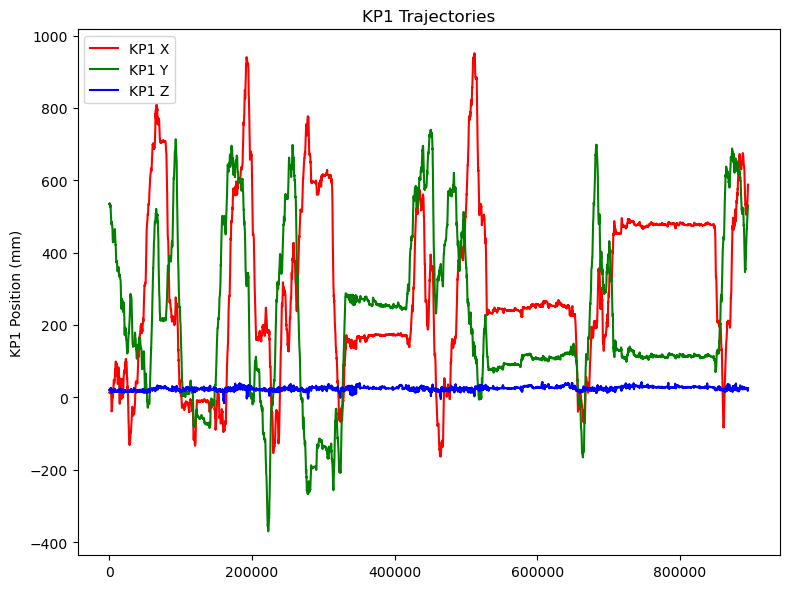

In [9]:
# import matplotlib.pyplot as plt
# df_check = df_merged_with_dF_F
# # Check if 'kp1_x', 'kp1_y', and 'kp1_z' exist in the DataFrame
# if {'kp1_x', 'kp1_y', 'kp1_z'}.issubset(df_check.columns):
#     fig = plt.figure(figsize=(8, 6))
#     gs = fig.add_gridspec(1, 1)  # 1x1 grid for simplicity
#     ax1 = fig.add_subplot(gs[0, 0])

#     # Plot the trajectories
#     ax1.plot(df_check.index, df_check['kp1_x'], color='red', label='KP1 X')
#     ax1.plot(df_check.index, df_check['kp1_y'], color='green', label='KP1 Y')
#     ax1.plot(df_check.index, df_check['kp1_z'], color='blue', label='KP1 Z')

#     # Add labels, title, and legend
#     ax1.set_ylabel('KP1 Position (mm)')
#     ax1.set_title('KP1 Trajectories')
#     ax1.legend(loc='upper left')

#     # Show the plot
#     plt.tight_layout()
#     plt.show()
# else:
#     print("KP1 columns not found (kp1_x, kp1_y, kp1_z). Check your DataFrame.")


In [10]:
df_merged_with_dF_F

,com_x,com_y,com_z,kp1_x,kp1_y,kp1_z,kp2_x,kp2_y,kp2_z,kp3_x,...,dF_F_roi77,dF_F_roi78,dF_F_roi79,dF_F_roi80,dF_F_roi81,dF_F_roi82,dF_F_roi83,dF_F_roi84,dF_F_roi85,dF_F_roi86
timestamp_ms_mini,,,,,,,,,,,,,,,,,,,,,
-28,41.706841,527.997575,10.797444,13.583969,533.438843,19.441160,35.926529,553.407898,19.521400,10.872994,...,5.450978,0.820760,1.868120,0.456811,1.014832,1.502012,2.116763,4.093864,-0.077933,0.503355
76,41.555597,528.230113,9.798887,12.700958,533.384277,18.862123,36.603622,552.807739,18.320738,11.129997,...,4.451628,0.938705,1.827905,0.178854,1.074192,1.681203,2.263206,3.354450,-0.027647,0.689176
173,41.311852,528.230113,9.676444,12.057464,535.820007,19.843277,36.404842,554.592407,18.491831,9.565206,...,3.323933,0.936644,1.776339,0.431037,1.219960,1.304163,1.663213,1.884310,0.063689,0.471626
284,41.311852,528.230113,9.676444,13.367846,534.604065,21.027853,38.033424,552.758179,18.725048,11.425719,...,3.754166,1.546126,2.289237,0.665953,1.346383,1.647476,2.277503,1.947350,0.081327,0.852772
383,41.070991,528.230113,9.798887,13.515869,534.713684,22.168043,39.517872,551.007874,19.403019,11.013714,...,3.008973,1.027965,1.807050,0.314316,1.866527,1.861826,2.073067,2.633667,0.038555,0.634334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895154,561.426280,491.163603,16.114240,571.295227,516.943359,17.747700,587.236877,493.928833,21.752941,593.425476,...,2.471127,-0.212385,0.395668,0.431881,0.664789,0.294658,0.583652,-0.117043,1.580501,0.633466
895262,565.447285,492.621053,16.114240,578.877075,522.396729,18.414005,593.763428,497.212463,21.706463,603.196899,...,0.593495,0.637050,0.732832,0.356040,0.354433,0.338199,0.067821,-0.772679,1.327936,0.584110
895354,571.293731,496.557728,16.212091,582.323486,525.675598,20.198135,600.818298,503.946777,22.326832,604.418945,...,2.264685,1.084643,0.529707,0.489709,0.657618,0.661684,0.214412,-0.757433,1.044665,0.846073


In [9]:
# print(df_merged_with_dF_F[['kp3_z', 'kp11_z', 'com_x', 'com_y', 'com_z']].head())


                       kp3_z      kp11_z      com_x       com_y      com_z
timestamp_ms_mini                                                         
-28                13.306341  528.808472  41.706841  527.997575  10.797444
 76                13.974595  528.399597  41.555597  528.230113   9.798887
 173               10.965623  531.370422  41.311852  528.230113   9.676444
 284               11.859568  531.087280  41.311852  528.230113   9.676444
 383               11.683537  530.554932  41.070991  528.230113   9.798887


In [ ]:
def generalized_correlation_with_calcium_shift_vis(
    data_df: pd.DataFrame,
    feature_indices: list,
    selected_neurons: list,
    feature_transform: callable,
    feature_label_prefix: str,
    dff_prefix: str = "dF_F_roi",
    calcium_prefix: str = "calcium_roi",
    max_lag: int = 10,
):
    """
    Generalized function to correlate features (location, magnitude, velocity, etc.) with calcium data.

    Parameters:
        data_df (pd.DataFrame): DataFrame containing both feature and calcium data.
        feature_indices (list): Indices of the feature columns to use.
        selected_neurons (list): List of selected neuron indices.
        feature_transform (callable): A function to transform the feature data (e.g., diff, abs, etc.).
        feature_label_prefix (str): Prefix for labeling the feature in results.
        dff_prefix (str): Prefix for ΔF/F calcium data columns.
        calcium_prefix (str): Prefix for raw calcium dynamics data columns.
        max_lag (int): Maximum number of frames to shift for correlation.

    Returns:
        pd.DataFrame: DataFrame with maximum correlations and lags for both ΔF/F and raw calcium dynamics.
    """
    results = []

    for neuron in selected_neurons:
        dff_col = f"{dff_prefix}{neuron}"
        calcium_col = f"{calcium_prefix}{neuron}"

        for index in feature_indices:
            label = f"{feature_label_prefix}_{index}"
            transformed_feature = feature_transform(data_df.iloc[:, index])  # Apply the transformation
            max_corr_dff, best_lag_dff = -float('inf'), 0
            max_corr_calcium, best_lag_calcium = -float('inf'), 0

            for lag in range(-max_lag, max_lag + 1):
                if lag < 0:
                    shifted_feature = transformed_feature.iloc[:lag]
                    shifted_dff = data_df[dff_col].iloc[-lag:]
                    shifted_calcium = data_df[calcium_col].iloc[-lag:]
                elif lag > 0:
                    shifted_feature = transformed_feature.iloc[lag:]
                    shifted_dff = data_df[dff_col].iloc[:-lag]
                    shifted_calcium = data_df[calcium_col].iloc[:-lag]
                else:
                    shifted_feature = transformed_feature
                    shifted_dff = data_df[dff_col]
                    shifted_calcium = data_df[calcium_col]

                # Calculate correlations
                dff_corr = np.corrcoef(shifted_feature, shifted_dff)[0, 1]
                calcium_corr = np.corrcoef(shifted_feature, shifted_calcium)[0, 1]

                # Update max correlation and best lag for ΔF/F
                if dff_corr > max_corr_dff:
                    max_corr_dff = dff_corr
                    best_lag_dff = lag

                # Update max correlation and best lag for calcium dynamics
                if calcium_corr > max_corr_calcium:
                    max_corr_calcium = calcium_corr
                    best_lag_calcium = lag

            # Append results to list
            results.append({
                "feature_label": label,
                "neuron": neuron,
                "max_corr_dff": max_corr_dff,
                "best_lag_dff": best_lag_dff,
                "max_corr_calcium": max_corr_calcium,
                "best_lag_calcium": best_lag_calcium,
            })

    # Convert results to DataFrame for easy visualization
    return pd.DataFrame(results)

# Example Usage
selected_neurons = [54, 57, 66, 38, 42, 37, 51]
feature_indices = [3, 11, 10, 9, 8]  # Indices for spineF, shoulderL, elbowL, wristL, forepawL
calcium_data = df_merged_with_dF_F

# Example for magnitude changes
correlation_df_magnitude = generalized_correlation_with_calcium_shift_vis(
    data_df=calcium_data,
    feature_indices=feature_indices,
    selected_neurons=selected_neurons,
    feature_transform=lambda x: x.diff().abs(),  # Transformation for magnitude changes
    feature_label_prefix="MagnitudeChange",
    max_lag=10
)

# Example visualization for magnitude changes
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of maximum correlations for ΔF/F
heatmap_data_dff = correlation_df_magnitude.pivot(index="feature_label", columns="neuron", values="max_corr_dff")
sns.heatmap(heatmap_data_dff, annot=True, cmap="coolwarm")
plt.title("Max Correlation (ΔF/F) for Magnitude Changes")
plt.show()

# Heatmap of best lags for ΔF/F
heatmap_data_lag = correlation_df_magnitude.pivot(index="feature_label", columns="neuron", values="best_lag_dff")
sns.heatmap(heatmap_data_lag, annot=True, cmap="coolwarm")
plt.title("Best Lag (ΔF/F) for Magnitude Changes")
plt.show()


  location_label  neuron  max_corr_dff  best_lag_dff  max_corr_calcium  \
0     Location_3      54     -0.027176           -10         -0.027176   
1    Location_11      54     -0.029121           -10         -0.029121   
2    Location_10      54     -0.021188           -10         -0.021188   
3     Location_9      54     -0.035175           -10         -0.035175   
4     Location_8      54     -0.030923           -10         -0.030923   

   best_lag_calcium  
0               -10  
1               -10  
2               -10  
3               -10  
4               -10  


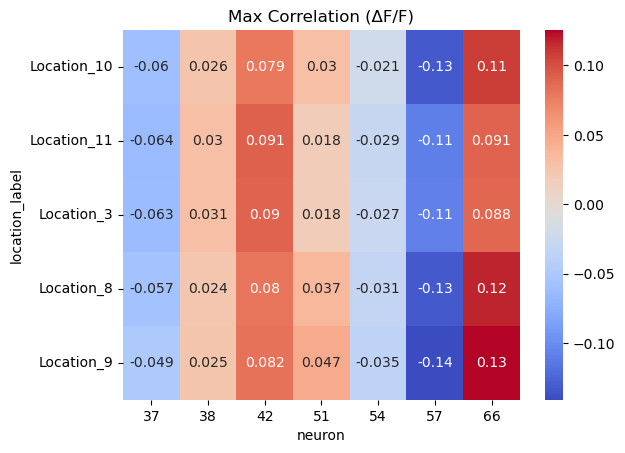

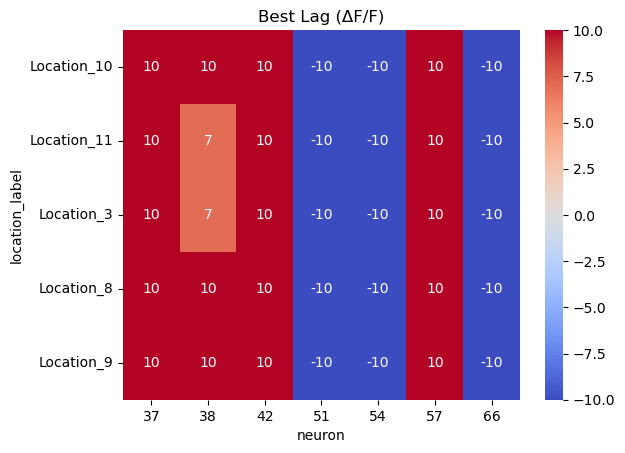

In [34]:
def correlate_locations_with_calcium_shift_vis(
    data_df: pd.DataFrame,
    location_indices: list,
    selected_neurons: list,
    dff_prefix: str = "dF_F_roi",
    calcium_prefix: str = "calcium_roi",
    max_lag: int = 10,
):
    """
    Correlate specific location indices with selected calcium data, considering time lags.

    Parameters:
        data_df (pd.DataFrame): DataFrame containing both location and calcium data.
        location_indices (list): Indices of the location columns to use.
        selected_neurons (list): List of selected neuron indices.
        dff_prefix (str): Prefix for ΔF/F calcium data columns.
        calcium_prefix (str): Prefix for raw calcium dynamics data columns.
        max_lag (int): Maximum number of frames to shift for correlation.

    Returns:
        pd.DataFrame: DataFrame with maximum correlations and lags for both ΔF/F and raw calcium dynamics.
    """
    results = []

    for neuron in selected_neurons:
        dff_col = f"{dff_prefix}{neuron}"
        calcium_col = f"{calcium_prefix}{neuron}"

        for index in location_indices:
            label = f"Location_{index}"
            max_corr_dff, best_lag_dff = -float('inf'), 0
            max_corr_calcium, best_lag_calcium = -float('inf'), 0

            for lag in range(-max_lag, max_lag + 1):
                if lag < 0:
                    shifted_locations = data_df.iloc[:lag, index]
                    shifted_dff = data_df[dff_col].iloc[-lag:]
                    shifted_calcium = data_df[calcium_col].iloc[-lag:]
                elif lag > 0:
                    shifted_locations = data_df.iloc[lag:, index]
                    shifted_dff = data_df[dff_col].iloc[:-lag]
                    shifted_calcium = data_df[calcium_col].iloc[:-lag]
                else:
                    shifted_locations = data_df.iloc[:, index]
                    shifted_dff = data_df[dff_col]
                    shifted_calcium = data_df[calcium_col]

                # Calculate correlations
                dff_corr = np.corrcoef(shifted_locations, shifted_dff)[0, 1]
                calcium_corr = np.corrcoef(shifted_locations, shifted_calcium)[0, 1]

                # Update max correlation and best lag for ΔF/F
                if dff_corr > max_corr_dff:
                    max_corr_dff = dff_corr
                    best_lag_dff = lag

                # Update max correlation and best lag for calcium dynamics
                if calcium_corr > max_corr_calcium:
                    max_corr_calcium = calcium_corr
                    best_lag_calcium = lag

            # Append results to list
            results.append({
                "location_label": label,
                "neuron": neuron,
                "max_corr_dff": max_corr_dff,
                "best_lag_dff": best_lag_dff,
                "max_corr_calcium": max_corr_calcium,
                "best_lag_calcium": best_lag_calcium,
            })

    # Convert results to DataFrame for easy visualization
    return pd.DataFrame(results)

# Example Usage
selected_neurons = [54, 57, 66, 38, 42, 37, 51]
location_indices = [3, 11, 10, 9, 8]  # Indices for spineF, shoulderL, elbowL, wristL, forepawL
calcium_data = df_merged_with_dF_F

correlation_df = correlate_locations_with_calcium_shift_vis(
    calcium_data, location_indices, selected_neurons, max_lag=10
)

# Print a preview of the DataFrame
print(correlation_df.head())

# Example visualization (e.g., using matplotlib or seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of maximum correlations for ΔF/F
heatmap_data_dff = correlation_df.pivot(index="location_label", columns="neuron", values="max_corr_dff")
sns.heatmap(heatmap_data_dff, annot=True, cmap="coolwarm")
plt.title("Max Correlation (ΔF/F)")
plt.show()

# Heatmap of best lags for ΔF/F
heatmap_data_lag = correlation_df.pivot(index="location_label", columns="neuron", values="best_lag_dff")
sns.heatmap(heatmap_data_lag, annot=True, cmap="coolwarm")
plt.title("Best Lag (ΔF/F)")
plt.show()


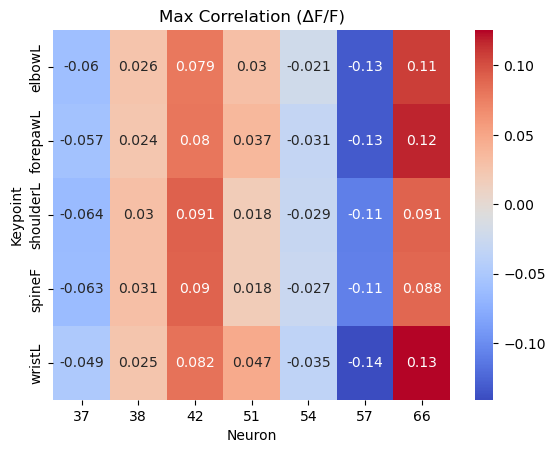

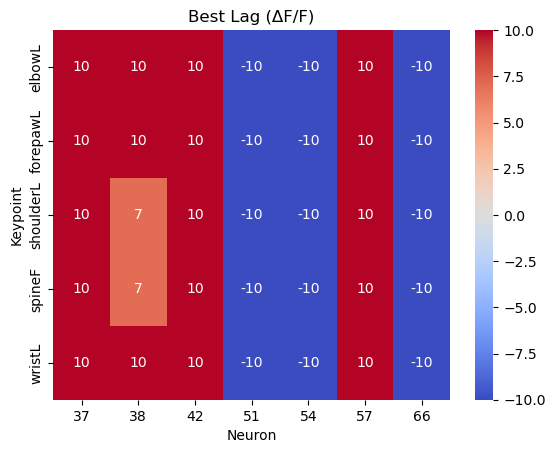

In [5]:
def correlate_locations_with_calcium_shift_vis(
    data_df: pd.DataFrame,
    location_indices: list,
    selected_neurons: list,
    location_labels: dict,
    dff_prefix: str = "dF_F_roi",
    calcium_prefix: str = "calcium_roi",
    max_lag: int = 10,
):
    """
    Correlate specific location indices with selected calcium data, considering time lags.

    Parameters:
        data_df (pd.DataFrame): DataFrame containing both location and calcium data.
        location_indices (list): Indices of the location columns to use.
        selected_neurons (list): List of selected neuron indices.
        location_labels (dict): Mapping of location indices to human-readable labels.
        dff_prefix (str): Prefix for ΔF/F calcium data columns.
        calcium_prefix (str): Prefix for raw calcium dynamics data columns.
        max_lag (int): Maximum number of frames to shift for correlation.

    Returns:
        pd.DataFrame: DataFrame with maximum correlations and lags for both ΔF/F and raw calcium dynamics.
    """
    results = []

    for neuron in selected_neurons:
        dff_col = f"{dff_prefix}{neuron}"
        calcium_col = f"{calcium_prefix}{neuron}"

        for index in location_indices:
            label = location_labels.get(index, f"Location_{index}")
            max_corr_dff, best_lag_dff = -float('inf'), 0
            max_corr_calcium, best_lag_calcium = -float('inf'), 0

            for lag in range(-max_lag, max_lag + 1):
                if lag < 0:
                    shifted_locations = data_df.iloc[:lag, index]
                    shifted_dff = data_df[dff_col].iloc[-lag:]
                    shifted_calcium = data_df[calcium_col].iloc[-lag:]
                elif lag > 0:
                    shifted_locations = data_df.iloc[lag:, index]
                    shifted_dff = data_df[dff_col].iloc[:-lag]
                    shifted_calcium = data_df[calcium_col].iloc[:-lag]
                else:
                    shifted_locations = data_df.iloc[:, index]
                    shifted_dff = data_df[dff_col]
                    shifted_calcium = data_df[calcium_col]

                # Calculate correlations
                dff_corr = np.corrcoef(shifted_locations, shifted_dff)[0, 1]
                calcium_corr = np.corrcoef(shifted_locations, shifted_calcium)[0, 1]

                # Update max correlation and best lag for ΔF/F
                if dff_corr > max_corr_dff:
                    max_corr_dff = dff_corr
                    best_lag_dff = lag

                # Update max correlation and best lag for calcium dynamics
                if calcium_corr > max_corr_calcium:
                    max_corr_calcium = calcium_corr
                    best_lag_calcium = lag

            # Append results to list
            results.append({
                "location_label": label,
                "neuron": neuron,
                "max_corr_dff": max_corr_dff,
                "best_lag_dff": best_lag_dff,
                "max_corr_calcium": max_corr_calcium,
                "best_lag_calcium": best_lag_calcium,
            })

    # Convert results to DataFrame for easy visualization
    return pd.DataFrame(results)

# Example Usage
selected_neurons = [54, 57, 66, 38, 42, 37, 51]
location_indices = [3, 11, 10, 9, 8]  # Indices for spineF, shoulderL, elbowL, wristL, forepawL
location_labels = {3: "spineF", 11: "shoulderL", 10: "elbowL", 9: "wristL", 8: "forepawL"}
calcium_data = df_merged_with_dF_F

correlation_df = correlate_locations_with_calcium_shift_vis(
    calcium_data, location_indices, selected_neurons, location_labels, max_lag=10
)

# Example Visualization with Keypoint Labels
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of maximum correlations for ΔF/F
heatmap_data_dff = correlation_df.pivot(index="location_label", columns="neuron", values="max_corr_dff")
sns.heatmap(heatmap_data_dff, annot=True, cmap="coolwarm")
plt.title("Max Correlation (ΔF/F)")
plt.xlabel("Neuron")
plt.ylabel("Keypoint")
plt.show()

# Heatmap of best lags for ΔF/F
heatmap_data_lag = correlation_df.pivot(index="location_label", columns="neuron", values="best_lag_dff")
sns.heatmap(heatmap_data_lag, annot=True, cmap="coolwarm")
plt.title("Best Lag (ΔF/F)")
plt.xlabel("Neuron")
plt.ylabel("Keypoint")
plt.show()


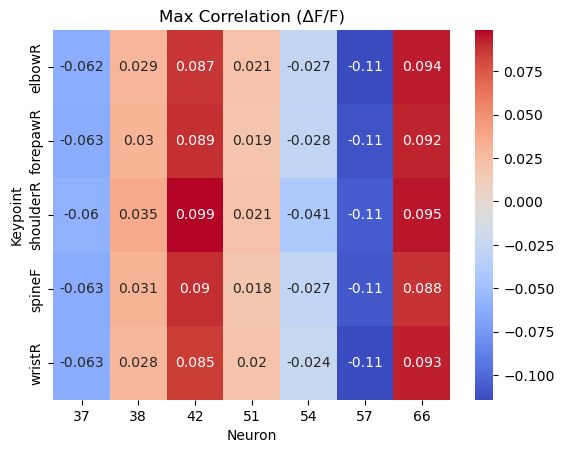

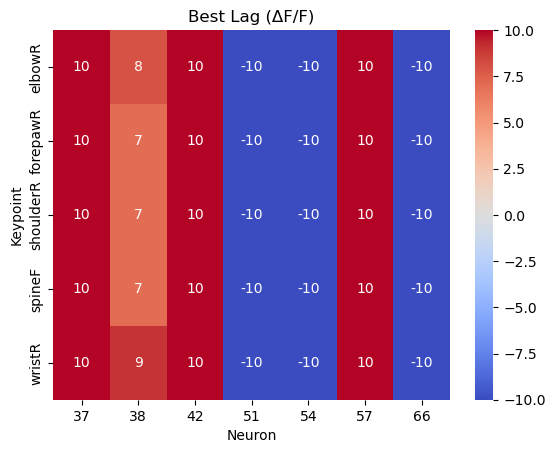

In [6]:
def correlate_locations_with_calcium_shift_vis(
    data_df: pd.DataFrame,
    location_indices: list,
    selected_neurons: list,
    location_labels: dict,
    dff_prefix: str = "dF_F_roi",
    calcium_prefix: str = "calcium_roi",
    max_lag: int = 10,
):
    """
    Correlate specific location indices with selected calcium data, considering time lags.

    Parameters:
        data_df (pd.DataFrame): DataFrame containing both location and calcium data.
        location_indices (list): Indices of the location columns to use.
        selected_neurons (list): List of selected neuron indices.
        location_labels (dict): Mapping of location indices to human-readable labels.
        dff_prefix (str): Prefix for ΔF/F calcium data columns.
        calcium_prefix (str): Prefix for raw calcium dynamics data columns.
        max_lag (int): Maximum number of frames to shift for correlation.

    Returns:
        pd.DataFrame: DataFrame with maximum correlations and lags for both ΔF/F and raw calcium dynamics.
    """
    results = []

    for neuron in selected_neurons:
        dff_col = f"{dff_prefix}{neuron}"
        calcium_col = f"{calcium_prefix}{neuron}"

        for index in location_indices:
            label = location_labels.get(index, f"Location_{index}")
            max_corr_dff, best_lag_dff = -float('inf'), 0
            max_corr_calcium, best_lag_calcium = -float('inf'), 0

            for lag in range(-max_lag, max_lag + 1):
                if lag < 0:
                    shifted_locations = data_df.iloc[:lag, index]
                    shifted_dff = data_df[dff_col].iloc[-lag:]
                    shifted_calcium = data_df[calcium_col].iloc[-lag:]
                elif lag > 0:
                    shifted_locations = data_df.iloc[lag:, index]
                    shifted_dff = data_df[dff_col].iloc[:-lag]
                    shifted_calcium = data_df[calcium_col].iloc[:-lag]
                else:
                    shifted_locations = data_df.iloc[:, index]
                    shifted_dff = data_df[dff_col]
                    shifted_calcium = data_df[calcium_col]

                # Calculate correlations
                dff_corr = np.corrcoef(shifted_locations, shifted_dff)[0, 1]
                calcium_corr = np.corrcoef(shifted_locations, shifted_calcium)[0, 1]

                # Update max correlation and best lag for ΔF/F
                if dff_corr > max_corr_dff:
                    max_corr_dff = dff_corr
                    best_lag_dff = lag

                # Update max correlation and best lag for calcium dynamics
                if calcium_corr > max_corr_calcium:
                    max_corr_calcium = calcium_corr
                    best_lag_calcium = lag

            # Append results to list
            results.append({
                "location_label": label,
                "neuron": neuron,
                "max_corr_dff": max_corr_dff,
                "best_lag_dff": best_lag_dff,
                "max_corr_calcium": max_corr_calcium,
                "best_lag_calcium": best_lag_calcium,
            })

    # Convert results to DataFrame for easy visualization
    return pd.DataFrame(results)

# Example Usage
selected_neurons = [54, 57, 66, 38, 42, 37, 51]
# location_indices = [3, 11, 10, 9, 8]  # Indices for spineF, shoulderL, elbowL, wristL, forepawL
location_indices = [3, 15, 14, 13, 12] 
location_labels = {3: "spineF", 15: "shoulderR", 14: "elbowR", 13: "wristR", 12: "forepawR"}

calcium_data = df_merged_with_dF_F

correlation_df = correlate_locations_with_calcium_shift_vis(
    calcium_data, location_indices, selected_neurons, location_labels, max_lag=10
)

# Example Visualization with Keypoint Labels
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of maximum correlations for ΔF/F
heatmap_data_dff = correlation_df.pivot(index="location_label", columns="neuron", values="max_corr_dff")
sns.heatmap(heatmap_data_dff, annot=True, cmap="coolwarm")
plt.title("Max Correlation (ΔF/F)")
plt.xlabel("Neuron")
plt.ylabel("Keypoint")
plt.show()

# Heatmap of best lags for ΔF/F
heatmap_data_lag = correlation_df.pivot(index="location_label", columns="neuron", values="best_lag_dff")
sns.heatmap(heatmap_data_lag, annot=True, cmap="coolwarm")
plt.title("Best Lag (ΔF/F)")
plt.xlabel("Neuron")
plt.ylabel("Keypoint")
plt.show()


  location_label  neuron  max_corr_dff  best_lag_dff  max_corr_calcium  \
0     Location_3      54     -0.027176           -10         -0.027176   
1    Location_15      54     -0.040857           -10         -0.040857   
2    Location_14      54     -0.026677           -10         -0.026677   
3    Location_13      54     -0.023747           -10         -0.023747   
4    Location_12      54     -0.027830           -10         -0.027830   

   best_lag_calcium  
0               -10  
1               -10  
2               -10  
3               -10  
4               -10  


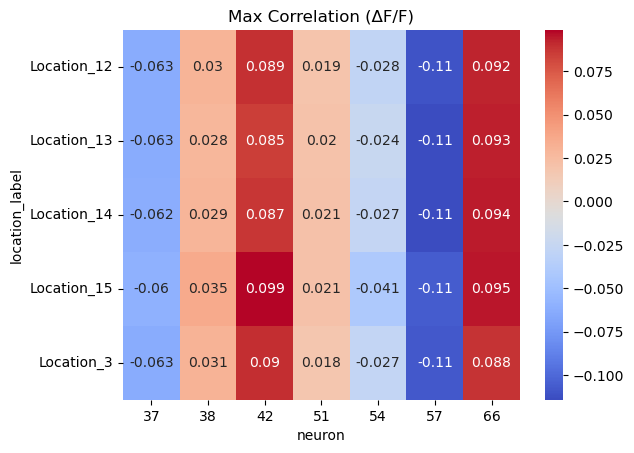

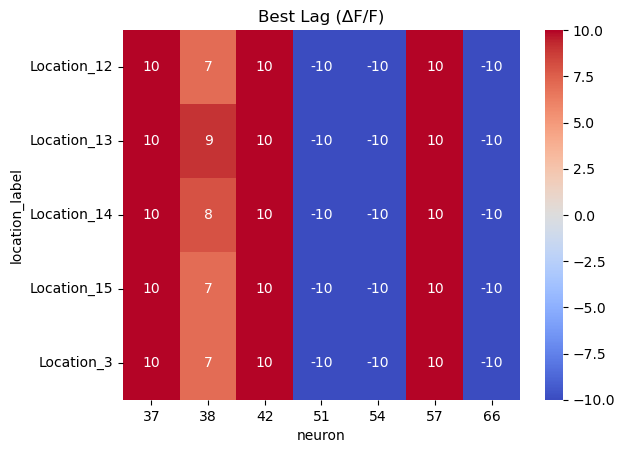

In [35]:
def correlate_locations_with_calcium_shift_vis(
    data_df: pd.DataFrame,
    location_indices: list,
    selected_neurons: list,
    dff_prefix: str = "dF_F_roi",
    calcium_prefix: str = "calcium_roi",
    max_lag: int = 10,
):
    """
    Correlate specific location indices with selected calcium data, considering time lags.

    Parameters:
        data_df (pd.DataFrame): DataFrame containing both location and calcium data.
        location_indices (list): Indices of the location columns to use.
        selected_neurons (list): List of selected neuron indices.
        dff_prefix (str): Prefix for ΔF/F calcium data columns.
        calcium_prefix (str): Prefix for raw calcium dynamics data columns.
        max_lag (int): Maximum number of frames to shift for correlation.

    Returns:
        pd.DataFrame: DataFrame with maximum correlations and lags for both ΔF/F and raw calcium dynamics.
    """
    results = []

    for neuron in selected_neurons:
        dff_col = f"{dff_prefix}{neuron}"
        calcium_col = f"{calcium_prefix}{neuron}"

        for index in location_indices:
            label = f"Location_{index}"
            max_corr_dff, best_lag_dff = -float('inf'), 0
            max_corr_calcium, best_lag_calcium = -float('inf'), 0

            for lag in range(-max_lag, max_lag + 1):
                if lag < 0:
                    shifted_locations = data_df.iloc[:lag, index]
                    shifted_dff = data_df[dff_col].iloc[-lag:]
                    shifted_calcium = data_df[calcium_col].iloc[-lag:]
                elif lag > 0:
                    shifted_locations = data_df.iloc[lag:, index]
                    shifted_dff = data_df[dff_col].iloc[:-lag]
                    shifted_calcium = data_df[calcium_col].iloc[:-lag]
                else:
                    shifted_locations = data_df.iloc[:, index]
                    shifted_dff = data_df[dff_col]
                    shifted_calcium = data_df[calcium_col]

                # Calculate correlations
                dff_corr = np.corrcoef(shifted_locations, shifted_dff)[0, 1]
                calcium_corr = np.corrcoef(shifted_locations, shifted_calcium)[0, 1]

                # Update max correlation and best lag for ΔF/F
                if dff_corr > max_corr_dff:
                    max_corr_dff = dff_corr
                    best_lag_dff = lag

                # Update max correlation and best lag for calcium dynamics
                if calcium_corr > max_corr_calcium:
                    max_corr_calcium = calcium_corr
                    best_lag_calcium = lag

            # Append results to list
            results.append({
                "location_label": label,
                "neuron": neuron,
                "max_corr_dff": max_corr_dff,
                "best_lag_dff": best_lag_dff,
                "max_corr_calcium": max_corr_calcium,
                "best_lag_calcium": best_lag_calcium,
            })

    # Convert results to DataFrame for easy visualization
    return pd.DataFrame(results)

# Example Usage
selected_neurons = [54, 57, 66, 38, 42, 37, 51]
# location_indices = [3, 11, 10, 9, 8]  # Indices for spineF, shoulderL, elbowL, wristL, forepawL
location_indices = [3, 15, 14, 13, 12]  # Indices for spineF, shoulderR, elbowR, wristR, forepawR
calcium_data = df_merged_with_dF_F

correlation_df = correlate_locations_with_calcium_shift_vis(
    calcium_data, location_indices, selected_neurons, max_lag=10
)

# Print a preview of the DataFrame
print(correlation_df.head())

# Example visualization (e.g., using matplotlib or seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of maximum correlations for ΔF/F
heatmap_data_dff = correlation_df.pivot(index="location_label", columns="neuron", values="max_corr_dff")
sns.heatmap(heatmap_data_dff, annot=True, cmap="coolwarm")
plt.title("Max Correlation (ΔF/F)")
plt.show()

# Heatmap of best lags for ΔF/F
heatmap_data_lag = correlation_df.pivot(index="location_label", columns="neuron", values="best_lag_dff")
sns.heatmap(heatmap_data_lag, annot=True, cmap="coolwarm")
plt.title("Best Lag (ΔF/F)")
plt.show()


In [ ]:
def correlate_magnitude_changes_with_calcium_shift_vis(
    data_df: pd.DataFrame,
    location_indices: list,
    selected_neurons: list,
    dff_prefix: str = "dF_F_roi",
    calcium_prefix: str = "calcium_roi",
    max_lag: int = 10,
):
    """
    Correlate magnitude changes of specific locations with selected calcium data, considering time lags.

    Parameters:
        data_df (pd.DataFrame): DataFrame containing both location and calcium data.
        location_indices (list): Indices of the location columns to use.
        selected_neurons (list): List of selected neuron indices.
        dff_prefix (str): Prefix for ΔF/F calcium data columns.
        calcium_prefix (str): Prefix for raw calcium dynamics data columns.
        max_lag (int): Maximum number of frames to shift for correlation.

    Returns:
        pd.DataFrame: DataFrame with maximum correlations and lags for both ΔF/F and raw calcium dynamics.
    """
    results = []

    for neuron in selected_neurons:
        dff_col = f"{dff_prefix}{neuron}"
        calcium_col = f"{calcium_prefix}{neuron}"

        for index in location_indices:
            label = f"Location_{index}_magnitude_change"
            magnitude_changes = data_df.iloc[:, index].diff().abs()  # Compute magnitude changes
            max_corr_dff, best_lag_dff = -float('inf'), 0
            max_corr_calcium, best_lag_calcium = -float('inf'), 0

            for lag in range(-max_lag, max_lag + 1):
                if lag < 0:
                    shifted_magnitudes = magnitude_changes.iloc[:lag]
                    shifted_dff = data_df[dff_col].iloc[-lag:]
                    shifted_calcium = data_df[calcium_col].iloc[-lag:]
                elif lag > 0:
                    shifted_magnitudes = magnitude_changes.iloc[lag:]
                    shifted_dff = data_df[dff_col].iloc[:-lag]
                    shifted_calcium = data_df[calcium_col].iloc[:-lag]
                else:
                    shifted_magnitudes = magnitude_changes
                    shifted_dff = data_df[dff_col]
                    shifted_calcium = data_df[calcium_col]

                # Calculate correlations
                dff_corr = np.corrcoef(shifted_magnitudes, shifted_dff)[0, 1]
                calcium_corr = np.corrcoef(shifted_magnitudes, shifted_calcium)[0, 1]

                # Update max correlation and best lag for ΔF/F
                if dff_corr > max_corr_dff:
                    max_corr_dff = dff_corr
                    best_lag_dff = lag

                # Update max correlation and best lag for calcium dynamics
                if calcium_corr > max_corr_calcium:
                    max_corr_calcium = calcium_corr
                    best_lag_calcium = lag

            # Append results to list
            results.append({
                "location_label": label,
                "neuron": neuron,
                "max_corr_dff": max_corr_dff,
                "best_lag_dff": best_lag_dff,
                "max_corr_calcium": max_corr_calcium,
                "best_lag_calcium": best_lag_calcium,
            })

    # Convert results to DataFrame for easy visualization
    return pd.DataFrame(results)

# Example Usage
selected_neurons = [54, 57, 66, 38, 42, 37, 51]
location_indices = [3, 11, 10, 9, 8]  # Indices for spineF, shoulderL, elbowL, wristL, forepawL
calcium_data = df_merged_with_dF_F

correlation_df = correlate_magnitude_changes_with_calcium_shift_vis(
    calcium_data, location_indices, selected_neurons, max_lag=10
)

# Print a preview of the DataFrame
print(correlation_df.head())

# Example visualization (e.g., using matplotlib or seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of maximum correlations for ΔF/F
heatmap_data_dff = correlation_df.pivot(index="location_label", columns="neuron", values="max_corr_dff")
sns.heatmap(heatmap_data_dff, annot=True, cmap="coolwarm")
plt.title("Max Correlation (ΔF/F) for Magnitude Changes")
plt.show()

# Heatmap of best lags for ΔF/F
heatmap_data_lag = correlation_df.pivot(index="location_label", columns="neuron", values="best_lag_dff")
sns.heatmap(heatmap_data_lag, annot=True, cmap="coolwarm")
plt.title("Best Lag (ΔF/F) for Magnitude Changes")
plt.show()


In [ ]:
def get_angles_from_h5_simple(df: pd.DataFrame, connectivity: list):
    angles, labels = [], []
    print("Calculating joint angles ... ")

    for triplet in connectivity:
        joint1, joint2, joint3 = triplet

        # Column names for each joint
        j1_cols = [f"kp{joint1}_x", f"kp{joint1}_y", f"kp{joint1}_z"]
        j2_cols = [f"kp{joint2}_x", f"kp{joint2}_y", f"kp{joint2}_z"]
        j3_cols = [f"kp{joint3}_x", f"kp{joint3}_y", f"kp{joint3}_z"]

        # Calculate vectors
        v1 = df[j1_cols].values - df[j2_cols].values
        v2 = df[j3_cols].values - df[j2_cols].values

        # Normalize vectors
        v1_u = v1 / np.linalg.norm(v1, axis=1)[:, None]
        v2_u = v2 / np.linalg.norm(v2, axis=1)[:, None]

        # Calculate angles
        angle = np.arccos(np.clip(np.sum(v1_u * v2_u, axis=1), -1, 1))
        angles.append(angle[:, None])

        # Label for the angle
        labels.append(f"ang_kp{joint1}_kp{joint2}_kp{joint3}")

    angles = np.concatenate(angles, axis=1)
    return angles, labels

def get_velocities_from_h5_simple(
    df: pd.DataFrame,
    joints: list = [0, 3, 5],
    widths: list = [3, 31, 89],
    abs_val: bool = False,
    f_s: int = 90,
    std: bool = True,
):
    vel = []
    labels = []
    print("Calculating velocities ... ")

    for joint in joints:
        joint_cols = [f"kp{joint}_x", f"kp{joint}_y", f"kp{joint}_z"]

        for width in widths:
            # Frame differences
            forward = df[joint_cols].shift(-width).values
            backward = df[joint_cols].shift(width).values
            dxyz = forward - backward

            # Velocity magnitude
            velocity = np.linalg.norm(dxyz, axis=1) * f_s / (2 * width + 1)

            if abs_val:
                velocity = np.abs(velocity)

            vel.append(velocity[:, None])
            labels.append(f"vel_kp{joint}_{2 * width + 1}")

    vel = np.concatenate(vel, axis=1)

    if std:
        vel_stds = []
        for joint in joints:
            joint_cols = [f"kp{joint}_x", f"kp{joint}_y", f"kp{joint}_z"]
            dxyz = df[joint_cols].diff().values
            for width in widths:
                rolling_std = (
                    pd.DataFrame(dxyz).rolling(2 * width + 1, min_periods=1).std().values
                )
                vel_stds.append(rolling_std[:, None])
                labels.append(f"vel_std_kp{joint}_{2 * width + 1}")
        vel = np.hstack((vel, np.concatenate(vel_stds, axis=1)))

    return vel, labels


In [14]:
mouse22_joint_names=[
        'EarL',         #0	
        'EarR',	        #1
        'Snout',	    #2
        'SpineF',	    #3
        'SpineM',	    #4
        'Tail(base)',	#5
        'Tail(mid)',	#6
        'Tail(end)',	#7
        'ForepawL',	    #8
        'WristL',	    #9
        'ElbowL',	    #10
        'ShoulderL',	#11
        'ForepawR',	    #12
        'WristR',	    #13
        'ElbowR',	    #14
        'ShoulderR',	#15
        'HindpawL',	    #16
        'AnkleL',	    #17
        'KneeL',	    #18
        'HindpawR',	    #19
        'AnkleR',	    #20
        'KneeR,',       #21
    ]
# this is the name, and this is connectivity:
mouse22_connectivities= [
        (0, 1),
        (1, 2),
        (0, 2),
        (0, 3),
        (1, 3),
        (2, 3),
        (3, 4),
        (4, 5),
        (5, 6),
        (6, 7),
        (8, 9),
        (9, 10),
        (10, 11),
        (11, 3),
        (12, 13),
        (13, 14),
        (14, 15),
        (15, 3),
        (16, 17),
        (17, 18),
        (18, 4),
        (19, 20),
        (20, 21),
        (21, 4),
    ]

left_frolimb = [
    (8, 9, 10),  # ForepawL, WristL, ElbowL
    (9, 10, 11), # WristL, ElbowL, ShoulderL
    (10, 11, 3)  # ElbowL, ShoulderL, SpineF
]

right_frolimb = [
    (12, 13, 14),  # ForepawR, WristR, ElbowR
    (13, 14, 15),  # WristR, ElbowR, ShoulderR
    (14, 15, 3)    # ElbowR, ShoulderR, SpineF
]


In [16]:
import numpy as np
angles, angle_labels = get_angles_from_h5_simple(df_merged_with_dF_F, left_frolimb)


Calculating joint angles ... 


In [18]:
angle_labels

['ang_kp8_kp9_kp10', 'ang_kp9_kp10_kp11', 'ang_kp10_kp11_kp3']

In [17]:
angles

array([[0.84073406, 0.22943716, 0.12707959],
       [0.81020556, 0.23494163, 0.13479003],
       [0.77202912, 0.24295983, 0.17165881],
       ...,
       [2.75834011, 0.27464144, 2.20994182],
       [2.67360962, 0.28913817, 2.33292866],
       [2.62891022, 0.31294438, 2.44761986]])

In [25]:
def correlate_angles_with_calcium(
    angles: np.ndarray,
    angle_labels: list,
    calcium_df: pd.DataFrame,
    selected_neurons: list,
    dff_prefix: str = "dF_F_roi",
    calcium_prefix: str = "calcium_roi",
):
    """
    Correlate joint angles with selected calcium data.

    Parameters:
        angles (np.ndarray): Calculated angles, shape (n_samples, n_angles).
        angle_labels (list): Labels corresponding to the angles.
        calcium_df (pd.DataFrame): DataFrame containing calcium data.
        selected_neurons (list): List of selected neuron indices.
        dff_prefix (str): Prefix for ΔF/F calcium data columns.
        calcium_prefix (str): Prefix for raw calcium dynamics data columns.

    Returns:
        dict: Correlation results for both ΔF/F and raw calcium dynamics.
    """
    correlations = {"dF_F": {}, "calcium": {}}

    for neuron in selected_neurons:
        dff_col = f"{dff_prefix}{neuron}"
        calcium_col = f"{calcium_prefix}{neuron}"

        for i, label in enumerate(angle_labels):
            # Correlate angles with ΔF/F data
            dff_corr = np.corrcoef(angles[:, i], calcium_df[dff_col].values)[0, 1]
            correlations["dF_F"].setdefault(label, []).append((neuron, dff_corr))

            # Correlate angles with raw calcium dynamics
            calcium_corr = np.corrcoef(angles[:, i], calcium_df[calcium_col].values)[0, 1]
            correlations["calcium"].setdefault(label, []).append((neuron, calcium_corr))

    return correlations


# Example Usage
selected_neurons = [54, 57, 66, 38, 42, 37, 51]
calcium_data = df_merged_with_dF_F
correlations = correlate_angles_with_calcium(
    angles, angle_labels, calcium_data, selected_neurons
)

# Print or save results
for angle_label, corr_list in correlations["dF_F"].items():
    print(f"Angle {angle_label} correlations with ΔF/F:")
    for neuron, corr in corr_list:
        print(f"  Neuron {neuron}: {corr:.3f}")

for angle_label, corr_list in correlations["calcium"].items():
    print(f"Angle {angle_label} correlations with calcium dynamics:")
    for neuron, corr in corr_list:
        print(f"  Neuron {neuron}: {corr:.3f}")


Angle ang_kp8_kp9_kp10 correlations with ΔF/F:
  Neuron 54: -0.089
  Neuron 57: 0.206
  Neuron 66: 0.038
  Neuron 38: -0.009
  Neuron 42: 0.054
  Neuron 37: -0.042
  Neuron 51: -0.085
Angle ang_kp9_kp10_kp11 correlations with ΔF/F:
  Neuron 54: -0.074
  Neuron 57: 0.135
  Neuron 66: -0.073
  Neuron 38: 0.092
  Neuron 42: -0.010
  Neuron 37: 0.031
  Neuron 51: -0.004
Angle ang_kp10_kp11_kp3 correlations with ΔF/F:
  Neuron 54: -0.054
  Neuron 57: 0.136
  Neuron 66: 0.103
  Neuron 38: -0.022
  Neuron 42: 0.070
  Neuron 37: -0.067
  Neuron 51: -0.071
Angle ang_kp8_kp9_kp10 correlations with calcium dynamics:
  Neuron 54: -0.089
  Neuron 57: 0.206
  Neuron 66: 0.038
  Neuron 38: -0.009
  Neuron 42: 0.054
  Neuron 37: -0.042
  Neuron 51: -0.085
Angle ang_kp9_kp10_kp11 correlations with calcium dynamics:
  Neuron 54: -0.074
  Neuron 57: 0.135
  Neuron 66: -0.073
  Neuron 38: 0.092
  Neuron 42: -0.010
  Neuron 37: 0.031
  Neuron 51: -0.004
Angle ang_kp10_kp11_kp3 correlations with calcium dyn

In [24]:
def correlate_angles_with_calcium_shift(
    angles: np.ndarray,
    angle_labels: list,
    calcium_df: pd.DataFrame,
    selected_neurons: list,
    dff_prefix: str = "dF_F_roi",
    calcium_prefix: str = "calcium_roi",
    max_lag: int = 10,
):
    """
    Correlate joint angles with selected calcium data, considering time lags.

    Parameters:
        angles (np.ndarray): Calculated angles, shape (n_samples, n_angles).
        angle_labels (list): Labels corresponding to the angles.
        calcium_df (pd.DataFrame): DataFrame containing calcium data.
        selected_neurons (list): List of selected neuron indices.
        dff_prefix (str): Prefix for ΔF/F calcium data columns.
        calcium_prefix (str): Prefix for raw calcium dynamics data columns.
        max_lag (int): Maximum number of frames to shift for correlation.

    Returns:
        dict: Maximum correlation results for both ΔF/F and raw calcium dynamics.
    """
    correlations = {"dF_F": {}, "calcium": {}}

    for neuron in selected_neurons:
        dff_col = f"{dff_prefix}{neuron}"
        calcium_col = f"{calcium_prefix}{neuron}"

        for i, label in enumerate(angle_labels):
            max_corr_dff, best_lag_dff = -float('inf'), 0
            max_corr_calcium, best_lag_calcium = -float('inf'), 0

            for lag in range(-max_lag, max_lag + 1):
                if lag < 0:
                    shifted_angles = angles[:lag, i]
                    shifted_dff = calcium_df[dff_col].values[-lag:]
                    shifted_calcium = calcium_df[calcium_col].values[-lag:]
                elif lag > 0:
                    shifted_angles = angles[lag:, i]
                    shifted_dff = calcium_df[dff_col].values[:-lag]
                    shifted_calcium = calcium_df[calcium_col].values[:-lag]
                else:
                    shifted_angles = angles[:, i]
                    shifted_dff = calcium_df[dff_col].values
                    shifted_calcium = calcium_df[calcium_col].values

                # Calculate correlations
                dff_corr = np.corrcoef(shifted_angles, shifted_dff)[0, 1]
                calcium_corr = np.corrcoef(shifted_angles, shifted_calcium)[0, 1]

                # Update max correlation and best lag for ΔF/F
                if dff_corr > max_corr_dff:
                    max_corr_dff = dff_corr
                    best_lag_dff = lag

                # Update max correlation and best lag for calcium dynamics
                if calcium_corr > max_corr_calcium:
                    max_corr_calcium = calcium_corr
                    best_lag_calcium = lag

            # Store results
            correlations["dF_F"].setdefault(label, []).append((neuron, max_corr_dff, best_lag_dff))
            correlations["calcium"].setdefault(label, []).append((neuron, max_corr_calcium, best_lag_calcium))

    return correlations

# Example Usage
selected_neurons = [54, 57, 66, 38, 42, 37, 51]
calcium_data = df_merged_with_dF_F
correlations = correlate_angles_with_calcium_shift(
    angles, angle_labels, calcium_data, selected_neurons, max_lag=10
)

# Print max correlations
for angle_label, corr_list in correlations["dF_F"].items():
    print(f"Angle {angle_label} maximum correlations with ΔF/F:")
    for neuron, max_corr, best_lag in corr_list:
        print(f"  Neuron {neuron}: Max Corr={max_corr:.3f} at Lag={best_lag}")

for angle_label, corr_list in correlations["calcium"].items():
    print(f"Angle {angle_label} maximum correlations with calcium dynamics:")
    for neuron, max_corr, best_lag in corr_list:
        print(f"  Neuron {neuron}: Max Corr={max_corr:.3f} at Lag={best_lag}")


Angle ang_kp8_kp9_kp10 maximum correlations with ΔF/F:
  Neuron 54: Max Corr=-0.080 at Lag=-7
  Neuron 57: Max Corr=0.211 at Lag=10
  Neuron 66: Max Corr=0.048 at Lag=-10
  Neuron 38: Max Corr=0.022 at Lag=10
  Neuron 42: Max Corr=0.084 at Lag=10
  Neuron 37: Max Corr=-0.030 at Lag=10
  Neuron 51: Max Corr=-0.058 at Lag=10
Angle ang_kp9_kp10_kp11 maximum correlations with ΔF/F:
  Neuron 54: Max Corr=-0.065 at Lag=10
  Neuron 57: Max Corr=0.137 at Lag=-2
  Neuron 66: Max Corr=-0.045 at Lag=7
  Neuron 38: Max Corr=0.113 at Lag=10
  Neuron 42: Max Corr=-0.003 at Lag=10
  Neuron 37: Max Corr=0.053 at Lag=-6
  Neuron 51: Max Corr=0.014 at Lag=10
Angle ang_kp10_kp11_kp3 maximum correlations with ΔF/F:
  Neuron 54: Max Corr=-0.050 at Lag=-7
  Neuron 57: Max Corr=0.145 at Lag=10
  Neuron 66: Max Corr=0.104 at Lag=-5
  Neuron 38: Max Corr=0.014 at Lag=10
  Neuron 42: Max Corr=0.106 at Lag=10
  Neuron 37: Max Corr=-0.055 at Lag=10
  Neuron 51: Max Corr=-0.038 at Lag=10
Angle ang_kp8_kp9_kp10 max

         angle_label  neuron  max_corr_dff  best_lag_dff  max_corr_calcium  \
0   ang_kp8_kp9_kp10      54     -0.080007            -7         -0.080007   
1  ang_kp9_kp10_kp11      54     -0.064713            10         -0.064713   
2  ang_kp10_kp11_kp3      54     -0.050182            -7         -0.050182   
3   ang_kp8_kp9_kp10      57      0.211007            10          0.211007   
4  ang_kp9_kp10_kp11      57      0.137222            -2          0.137222   

   best_lag_calcium  
0                -7  
1                10  
2                -7  
3                10  
4                -2  


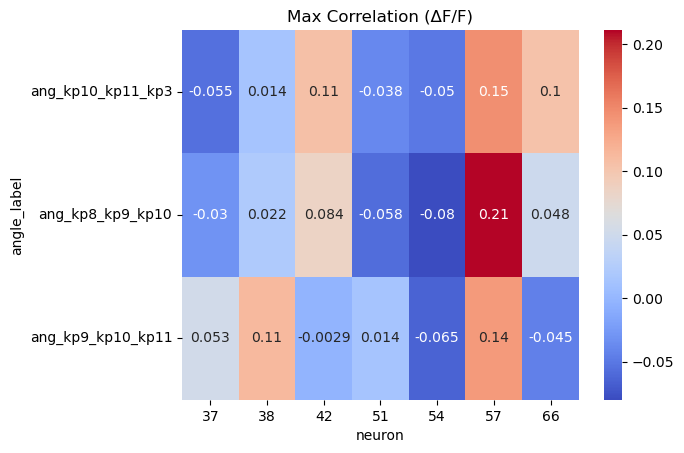

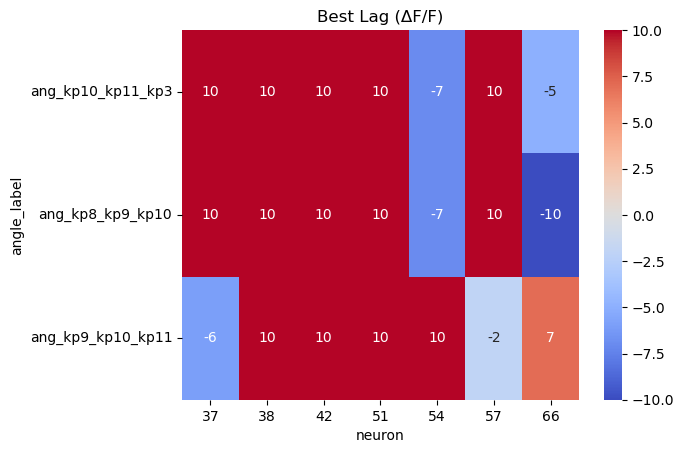

In [31]:
def correlate_angles_with_calcium_shift_vis(
    angles: np.ndarray,
    angle_labels: list,
    calcium_df: pd.DataFrame,
    selected_neurons: list,
    dff_prefix: str = "dF_F_roi",
    calcium_prefix: str = "calcium_roi",
    max_lag: int = 10,
):
    """
    Correlate joint angles with selected calcium data, considering time lags.

    Parameters:
        angles (np.ndarray): Calculated angles, shape (n_samples, n_angles).
        angle_labels (list): Labels corresponding to the angles.
        calcium_df (pd.DataFrame): DataFrame containing calcium data.
        selected_neurons (list): List of selected neuron indices.
        dff_prefix (str): Prefix for ΔF/F calcium data columns.
        calcium_prefix (str): Prefix for raw calcium dynamics data columns.
        max_lag (int): Maximum number of frames to shift for correlation.

    Returns:
        pd.DataFrame: DataFrame with maximum correlations and lags for both ΔF/F and raw calcium dynamics.
    """
    results = []

    for neuron in selected_neurons:
        dff_col = f"{dff_prefix}{neuron}"
        calcium_col = f"{calcium_prefix}{neuron}"

        for i, label in enumerate(angle_labels):
            max_corr_dff, best_lag_dff = -float('inf'), 0
            max_corr_calcium, best_lag_calcium = -float('inf'), 0

            for lag in range(-max_lag, max_lag + 1):
                if lag < 0:
                    shifted_angles = angles[:lag, i]
                    shifted_dff = calcium_df[dff_col].values[-lag:]
                    shifted_calcium = calcium_df[calcium_col].values[-lag:]
                elif lag > 0:
                    shifted_angles = angles[lag:, i]
                    shifted_dff = calcium_df[dff_col].values[:-lag]
                    shifted_calcium = calcium_df[calcium_col].values[:-lag]
                else:
                    shifted_angles = angles[:, i]
                    shifted_dff = calcium_df[dff_col].values
                    shifted_calcium = calcium_df[calcium_col].values

                # Calculate correlations
                dff_corr = np.corrcoef(shifted_angles, shifted_dff)[0, 1]
                calcium_corr = np.corrcoef(shifted_angles, shifted_calcium)[0, 1]

                # Update max correlation and best lag for ΔF/F
                if dff_corr > max_corr_dff:
                    max_corr_dff = dff_corr
                    best_lag_dff = lag

                # Update max correlation and best lag for calcium dynamics
                if calcium_corr > max_corr_calcium:
                    max_corr_calcium = calcium_corr
                    best_lag_calcium = lag

            # Append results to list
            results.append({
                "angle_label": label,
                "neuron": neuron,
                "max_corr_dff": max_corr_dff,
                "best_lag_dff": best_lag_dff,
                "max_corr_calcium": max_corr_calcium,
                "best_lag_calcium": best_lag_calcium,
            })

    # Convert results to DataFrame for easy visualization
    return pd.DataFrame(results)

# Example Usage
selected_neurons = [54, 57, 66, 38, 42, 37, 51]
calcium_data = df_merged_with_dF_F
correlation_df = correlate_angles_with_calcium_shift_vis(
    angles, angle_labels, calcium_data, selected_neurons, max_lag=10
)

# Print a preview of the DataFrame
print(correlation_df.head())

# Example visualization (e.g., using matplotlib or seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of maximum correlations for ΔF/F
heatmap_data_dff = correlation_df.pivot(index="angle_label", columns="neuron", values="max_corr_dff")
sns.heatmap(heatmap_data_dff, annot=True, cmap="coolwarm")
plt.title("Max Correlation (ΔF/F)")
plt.show()

# Heatmap of best lags for ΔF/F
heatmap_data_lag = correlation_df.pivot(index="angle_label", columns="neuron", values="best_lag_dff")
sns.heatmap(heatmap_data_lag, annot=True, cmap="coolwarm")
plt.title("Best Lag (ΔF/F)")
plt.show()


In [21]:
import numpy as np
rangles, rangle_labels = get_angles_from_h5_simple(df_merged_with_dF_F, right_frolimb)

Calculating joint angles ... 


In [26]:
# Example Usage
selected_neurons = [54, 57, 66, 38, 42, 37, 51]
calcium_data = df_merged_with_dF_F
correlations = correlate_angles_with_calcium(
    rangles, rangle_labels, calcium_data, selected_neurons
)

# Print or save results
for angle_label, corr_list in correlations["dF_F"].items():
    print(f"Angle {angle_label} correlations with ΔF/F:")
    for neuron, corr in corr_list:
        print(f"  Neuron {neuron}: {corr:.3f}")

for angle_label, corr_list in correlations["calcium"].items():
    print(f"Angle {angle_label} correlations with calcium dynamics:")
    for neuron, corr in corr_list:
        print(f"  Neuron {neuron}: {corr:.3f}")

Angle ang_kp12_kp13_kp14 correlations with ΔF/F:
  Neuron 54: 0.064
  Neuron 57: 0.021
  Neuron 66: -0.024
  Neuron 38: -0.052
  Neuron 42: -0.036
  Neuron 37: 0.005
  Neuron 51: 0.016
Angle ang_kp13_kp14_kp15 correlations with ΔF/F:
  Neuron 54: -0.071
  Neuron 57: 0.102
  Neuron 66: -0.077
  Neuron 38: 0.081
  Neuron 42: 0.183
  Neuron 37: -0.058
  Neuron 51: 0.051
Angle ang_kp14_kp15_kp3 correlations with ΔF/F:
  Neuron 54: -0.094
  Neuron 57: 0.027
  Neuron 66: -0.027
  Neuron 38: 0.096
  Neuron 42: 0.058
  Neuron 37: 0.033
  Neuron 51: 0.109
Angle ang_kp12_kp13_kp14 correlations with calcium dynamics:
  Neuron 54: 0.064
  Neuron 57: 0.021
  Neuron 66: -0.024
  Neuron 38: -0.052
  Neuron 42: -0.036
  Neuron 37: 0.005
  Neuron 51: 0.016
Angle ang_kp13_kp14_kp15 correlations with calcium dynamics:
  Neuron 54: -0.071
  Neuron 57: 0.102
  Neuron 66: -0.077
  Neuron 38: 0.081
  Neuron 42: 0.183
  Neuron 37: -0.058
  Neuron 51: 0.051
Angle ang_kp14_kp15_kp3 correlations with calcium dyn

In [27]:
selected_neurons = [54, 57, 66, 38, 42, 37, 51]
calcium_data = df_merged_with_dF_F
correlations = correlate_angles_with_calcium_shift(
    rangles, rangle_labels, calcium_data, selected_neurons, max_lag=10
)

# Print max correlations
for angle_label, corr_list in correlations["dF_F"].items():
    print(f"Angle {angle_label} maximum correlations with ΔF/F:")
    for neuron, max_corr, best_lag in corr_list:
        print(f"  Neuron {neuron}: Max Corr={max_corr:.3f} at Lag={best_lag}")

for angle_label, corr_list in correlations["calcium"].items():
    print(f"Angle {angle_label} maximum correlations with calcium dynamics:")
    for neuron, max_corr, best_lag in corr_list:
        print(f"  Neuron {neuron}: Max Corr={max_corr:.3f} at Lag={best_lag}")

Angle ang_kp12_kp13_kp14 maximum correlations with ΔF/F:
  Neuron 54: Max Corr=0.073 at Lag=-5
  Neuron 57: Max Corr=0.043 at Lag=-10
  Neuron 66: Max Corr=0.015 at Lag=-10
  Neuron 38: Max Corr=-0.047 at Lag=9
  Neuron 42: Max Corr=-0.034 at Lag=1
  Neuron 37: Max Corr=0.037 at Lag=10
  Neuron 51: Max Corr=0.035 at Lag=-10
Angle ang_kp13_kp14_kp15 maximum correlations with ΔF/F:
  Neuron 54: Max Corr=-0.059 at Lag=-10
  Neuron 57: Max Corr=0.112 at Lag=-10
  Neuron 66: Max Corr=-0.070 at Lag=9
  Neuron 38: Max Corr=0.100 at Lag=9
  Neuron 42: Max Corr=0.185 at Lag=2
  Neuron 37: Max Corr=-0.051 at Lag=9
  Neuron 51: Max Corr=0.055 at Lag=3
Angle ang_kp14_kp15_kp3 maximum correlations with ΔF/F:
  Neuron 54: Max Corr=-0.090 at Lag=7
  Neuron 57: Max Corr=0.031 at Lag=10
  Neuron 66: Max Corr=-0.013 at Lag=-10
  Neuron 38: Max Corr=0.096 at Lag=0
  Neuron 42: Max Corr=0.060 at Lag=-7
  Neuron 37: Max Corr=0.036 at Lag=-10
  Neuron 51: Max Corr=0.115 at Lag=8
Angle ang_kp12_kp13_kp14 max

          angle_label  neuron  max_corr_dff  best_lag_dff  max_corr_calcium  \
0  ang_kp12_kp13_kp14      54      0.073068            -5          0.073068   
1  ang_kp13_kp14_kp15      54     -0.058517           -10         -0.058517   
2   ang_kp14_kp15_kp3      54     -0.089587             7         -0.089587   
3  ang_kp12_kp13_kp14      57      0.042502           -10          0.042502   
4  ang_kp13_kp14_kp15      57      0.111892           -10          0.111892   

   best_lag_calcium  
0                -5  
1               -10  
2                 7  
3               -10  
4               -10  


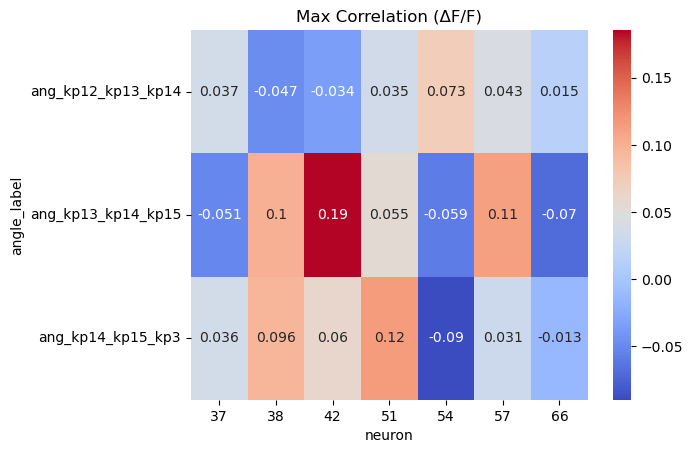

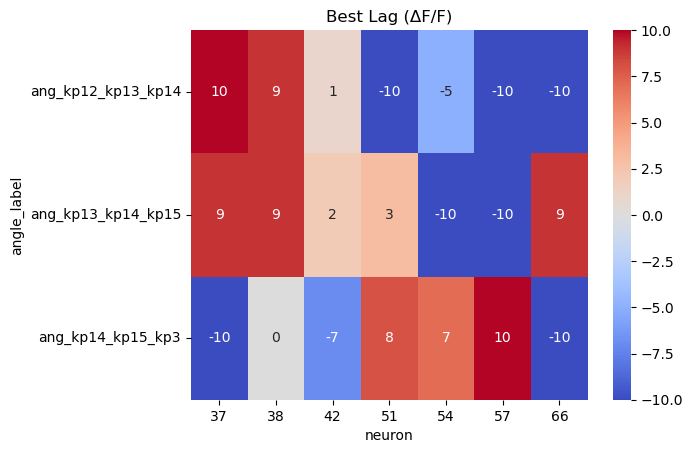

In [32]:
# Example Usage
selected_neurons = [54, 57, 66, 38, 42, 37, 51]
calcium_data = df_merged_with_dF_F
correlation_df = correlate_angles_with_calcium_shift_vis(
    rangles, rangle_labels, calcium_data, selected_neurons, max_lag=10
)

# Print a preview of the DataFrame
print(correlation_df.head())

# Example visualization (e.g., using matplotlib or seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of maximum correlations for ΔF/F
heatmap_data_dff = correlation_df.pivot(index="angle_label", columns="neuron", values="max_corr_dff")
sns.heatmap(heatmap_data_dff, annot=True, cmap="coolwarm")
plt.title("Max Correlation (ΔF/F)")
plt.show()

# Heatmap of best lags for ΔF/F
heatmap_data_lag = correlation_df.pivot(index="angle_label", columns="neuron", values="best_lag_dff")
sns.heatmap(heatmap_data_lag, annot=True, cmap="coolwarm")
plt.title("Best Lag (ΔF/F)")
plt.show()


In [ ]:
velocities, velocity_labels = get_velocities_from_h5(
    df_merged_with_dF_F, mouse22_joint_names, joints=[0, 3, 5], widths=[3, 31, 89]
)
